In [13]:
import psycopg2
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pytz


controllers_path = os.path.abspath("../historic_updater")
sys.path.append(controllers_path)

from controllers import *

## Connections

In [9]:
credentials = CredentialsManager()
pg_credentials = PgCredentialsManager(credentials)
cnx=PgConnecionManager(pg_credentials)

Credentials set
Connection sucessful
Disconnection successful


## Read data

In [10]:
# Consulta SQL
query = "SELECT * FROM public.btcusdtfutures_live"

# Cargar datos en un DataFrame
df = pd.read_sql(query, cnx.connection)

# Cerrar conexión
cnx.connection.close()

/tmp/ipykernel_1052/282707416.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx.connection)


## Data preprocessing

In [11]:
df['year']= df.open_time.dt.year
df['month']= df.open_time.dt.month
df['year-month'] = df.open_time.dt.strftime('%Y%m').astype(int)
df['hour'] = df.open_time.dt.hour

In [12]:
df.sort_values(by='open_time',ascending=False,inplace=True)
df

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month,hour
561299,2025-02-03 05:10:00,97075.60,98999.80,97075.60,98560.90,3.940,2025-02-03 05:14:59.999,3.867814e+05,64,1.103,1.085969e+05,0.0,2025,2,202502,5
561298,2025-02-03 05:05:00,97075.50,98999.80,96921.20,97520.10,4.572,2025-02-03 05:09:59.999,4.494279e+05,156,3.063,3.019729e+05,0.0,2025,2,202502,5
561297,2025-02-03 05:00:00,96500.00,97377.00,96500.00,96921.30,1.666,2025-02-03 05:04:59.999,1.614990e+05,45,1.433,1.389481e+05,0.0,2025,2,202502,5
561296,2025-02-03 04:55:00,98400.00,98999.80,95000.10,96500.00,13.546,2025-02-03 04:59:59.999,1.321010e+06,217,5.973,5.898434e+05,0.0,2025,2,202502,4
561295,2025-02-03 04:50:00,98340.00,98999.80,98000.00,98999.80,5.449,2025-02-03 04:54:59.999,5.387066e+05,53,4.411,4.366372e+05,0.0,2025,2,202502,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559499,2019-09-02 07:30:00,9740.01,9741.98,9735.88,9741.00,11742.647,2019-09-02 07:34:59.999,1.429618e+09,521,5666.799,6.899566e+08,0.0,2019,9,201909,7
559498,2019-09-02 07:25:00,9735.99,9742.00,9734.08,9740.01,11334.200,2019-09-02 07:29:59.999,1.379642e+09,397,5586.620,6.800527e+08,0.0,2019,9,201909,7
559497,2019-09-02 07:20:00,9736.10,9741.42,9734.14,9735.05,10085.650,2019-09-02 07:24:59.999,1.227622e+09,352,4641.600,5.650122e+08,0.0,2019,9,201909,7
559496,2019-09-02 07:15:00,9739.16,9742.23,9735.15,9736.39,11407.030,2019-09-02 07:19:59.999,1.388855e+09,374,7122.550,8.672433e+08,0.0,2019,9,201909,7


## Year data distribution

<Axes: xlabel='year'>

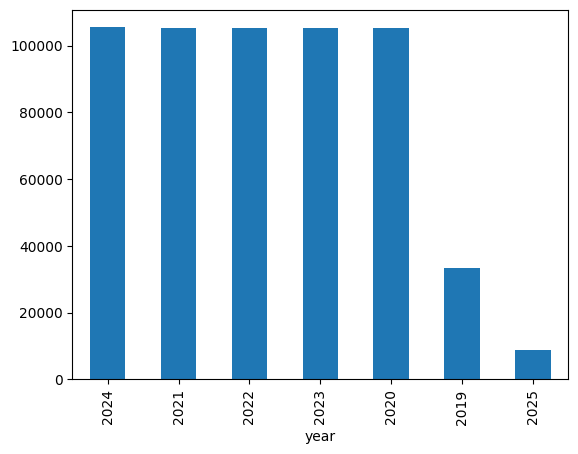

In [9]:
df.year.value_counts().plot(kind='bar')

In [10]:
df.year.value_counts()

year
2024    105408
2021    105120
2022    105120
2023    105115
2020    105106
2019     33323
2025      8929
Name: count, dtype: int64

In [11]:
df = df[df['year']>2021]

In [12]:
df.describe()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month
count,324572,324572.000000,324572.000000,324572.000000,324572.000000,324572.000000,324572,3.245720e+05,324572.000000,324572.000000,3.245720e+05,324572.0,324572.000000,324572.000000,324572.000000
mean,2023-07-18 11:59:22.644651776,42727.574376,42986.856282,42482.201983,42725.255682,447.408502,2023-07-18 12:04:22.643652608,1.518604e+07,234.374358,225.376099,7.659621e+06,0.0,2023.055907,6.369970,202311.960717
min,2022-01-01 00:00:00,15600.000000,15700.000000,15000.000000,15585.000000,0.000000,2022-01-01 00:04:59.999000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,2022.000000,1.000000,202201.000000
25%,2022-10-09 17:53:45,25798.825000,25931.550000,25690.500000,25800.000000,38.677750,2022-10-09 17:58:44.999000064,2.471717e+06,96.000000,16.760000,1.073858e+06,0.0,2022.000000,3.000000,202210.000000
50%,2023-07-18 11:47:30,36600.000000,36825.400000,36341.550000,36601.800000,336.943000,2023-07-18 11:52:29.999000064,9.148436e+06,158.000000,162.085000,4.449436e+06,0.0,2023.000000,6.000000,202307.000000
75%,2024-04-25 06:06:15,60590.025000,60809.350000,60317.800000,60582.025000,521.963500,2024-04-25 06:11:14.999000064,1.636562e+07,272.000000,256.458000,8.006620e+06,0.0,2024.000000,9.000000,202404.000000
max,2025-02-01 00:00:00,123400.000000,135236.000000,112581.900000,123300.100000,25085.728000,2025-02-01 00:04:59.999000,1.028864e+09,303808.000000,14316.255000,6.322491e+08,0.0,2025.000000,12.000000,202502.000000
std,NaN,22696.359290,22835.498391,22555.158817,22695.987486,921.103858,NaN,3.918756e+07,1175.737609,494.192671,2.097320e+07,0.0,0.869224,3.519113,86.648801


## Indicator analisys

In [13]:
df['candle_body_price'] = df.open - df.close
df['candle_body_percent'] = df.candle_body_price/df.open *100
df['candle_range_price'] = df.high - df.low
df['candle_range_percent'] = df.candle_range_price/df.open *100


/tmp/ipykernel_45558/2817156364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['candle_body_price'] = df.open - df.close
/tmp/ipykernel_45558/2817156364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['candle_body_percent'] = df.candle_body_price/df.open *100
/tmp/ipykernel_45558/2817156364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

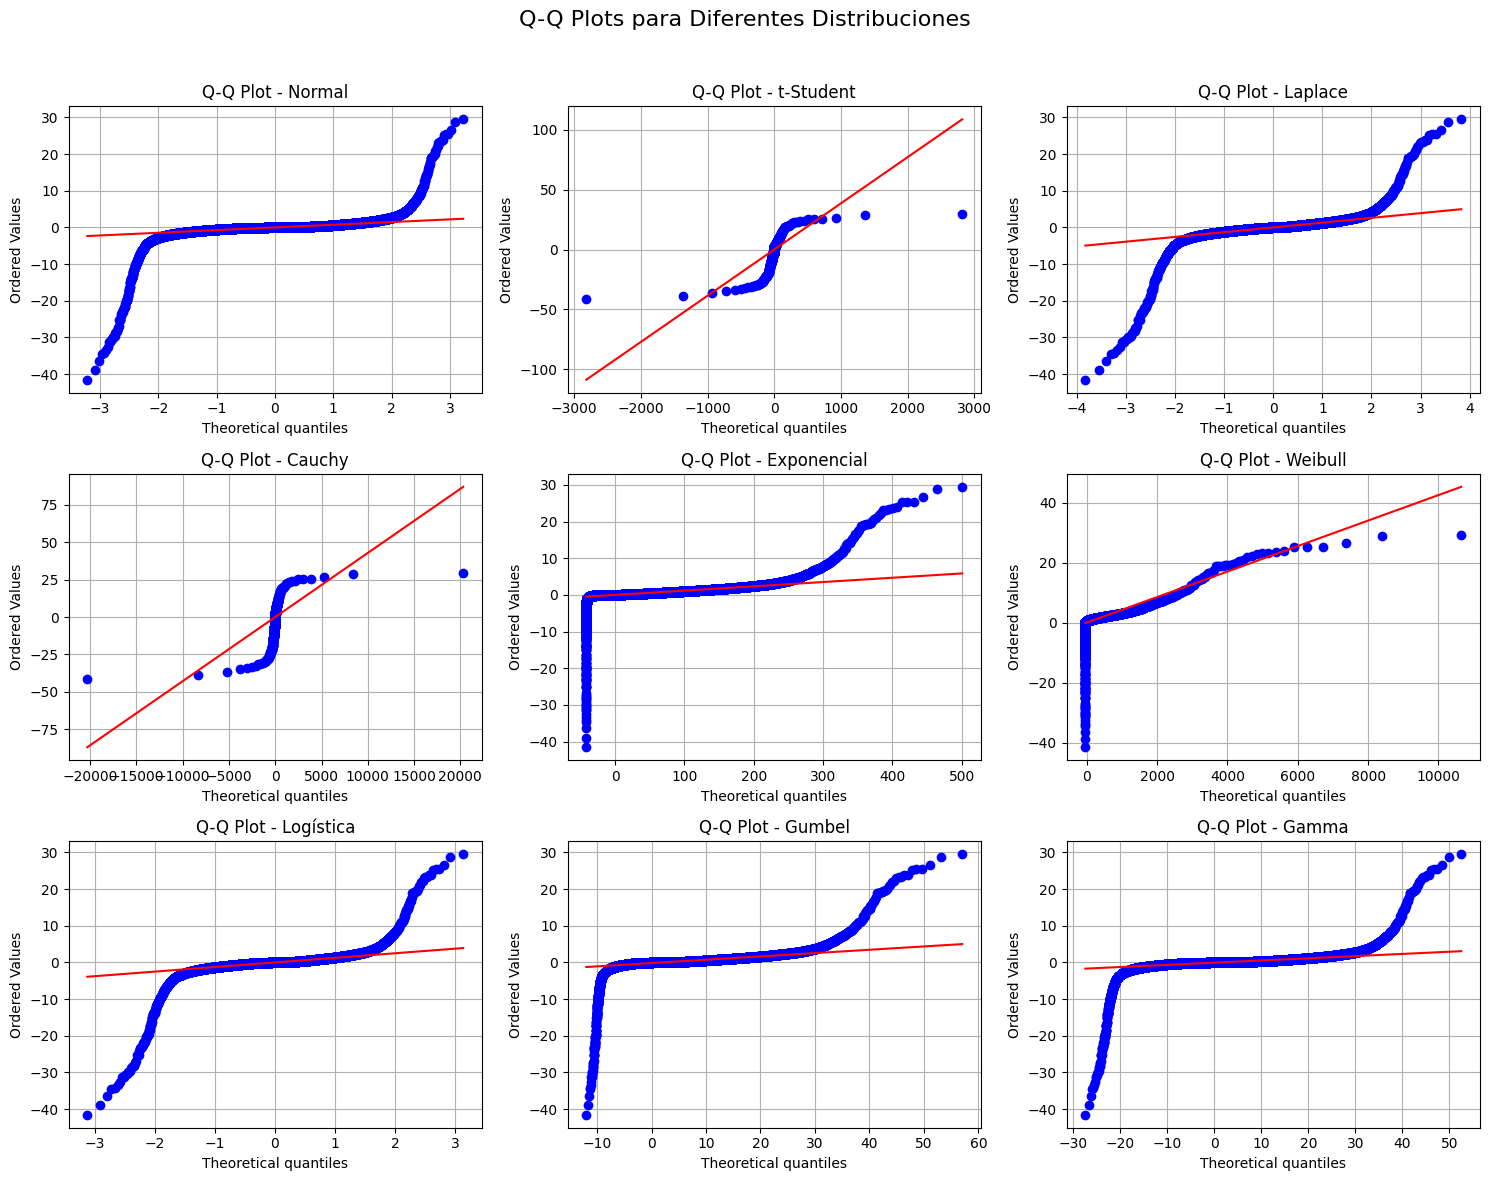

In [14]:

data = df['candle_body_percent']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


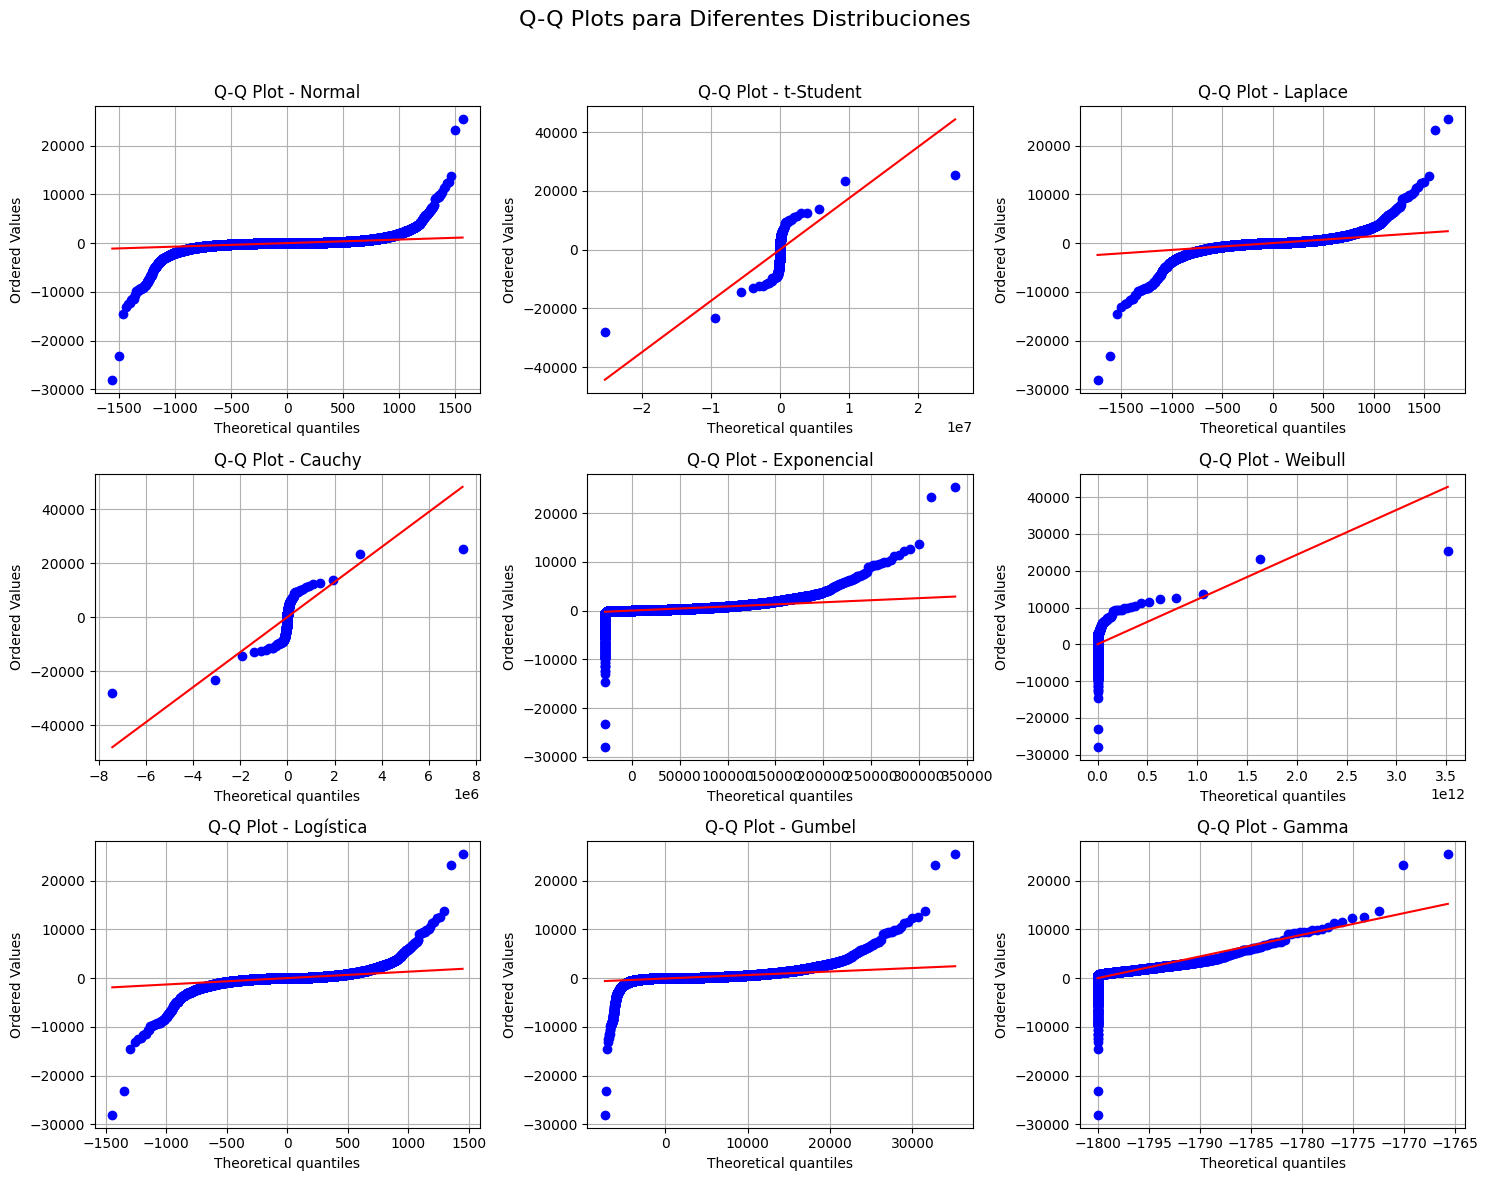

In [15]:
data = df['candle_body_price']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


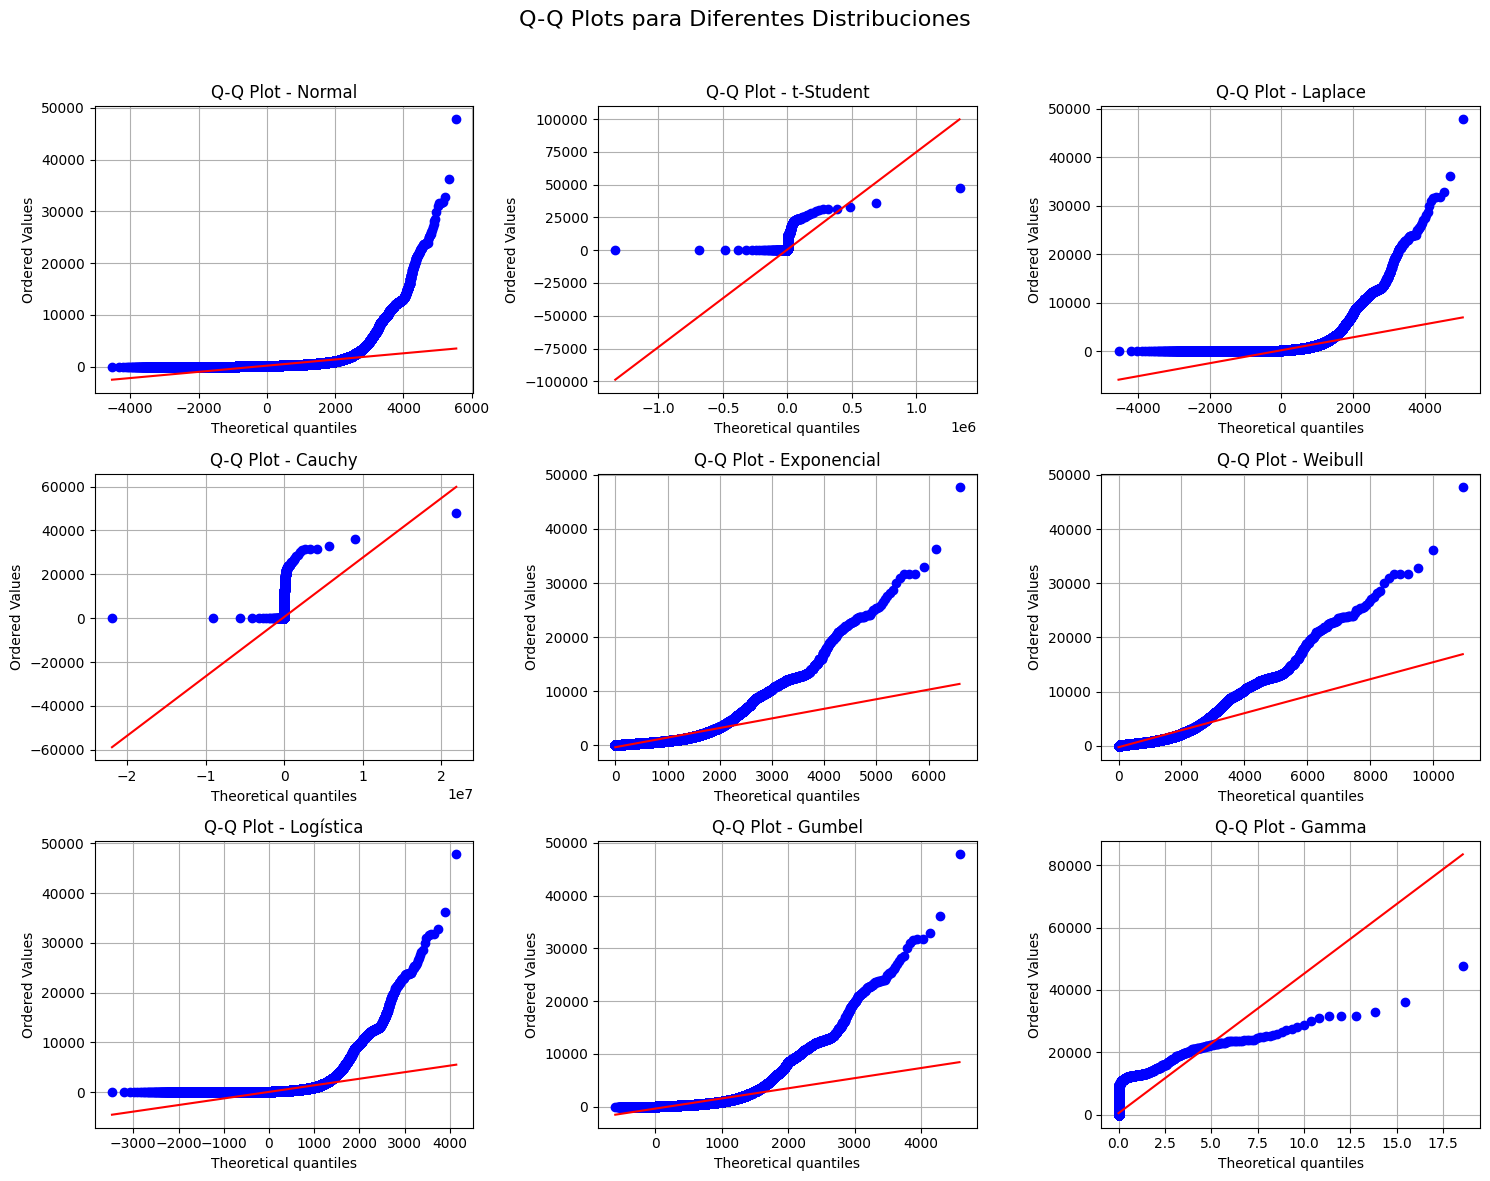

In [16]:

data = df['candle_range_price']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


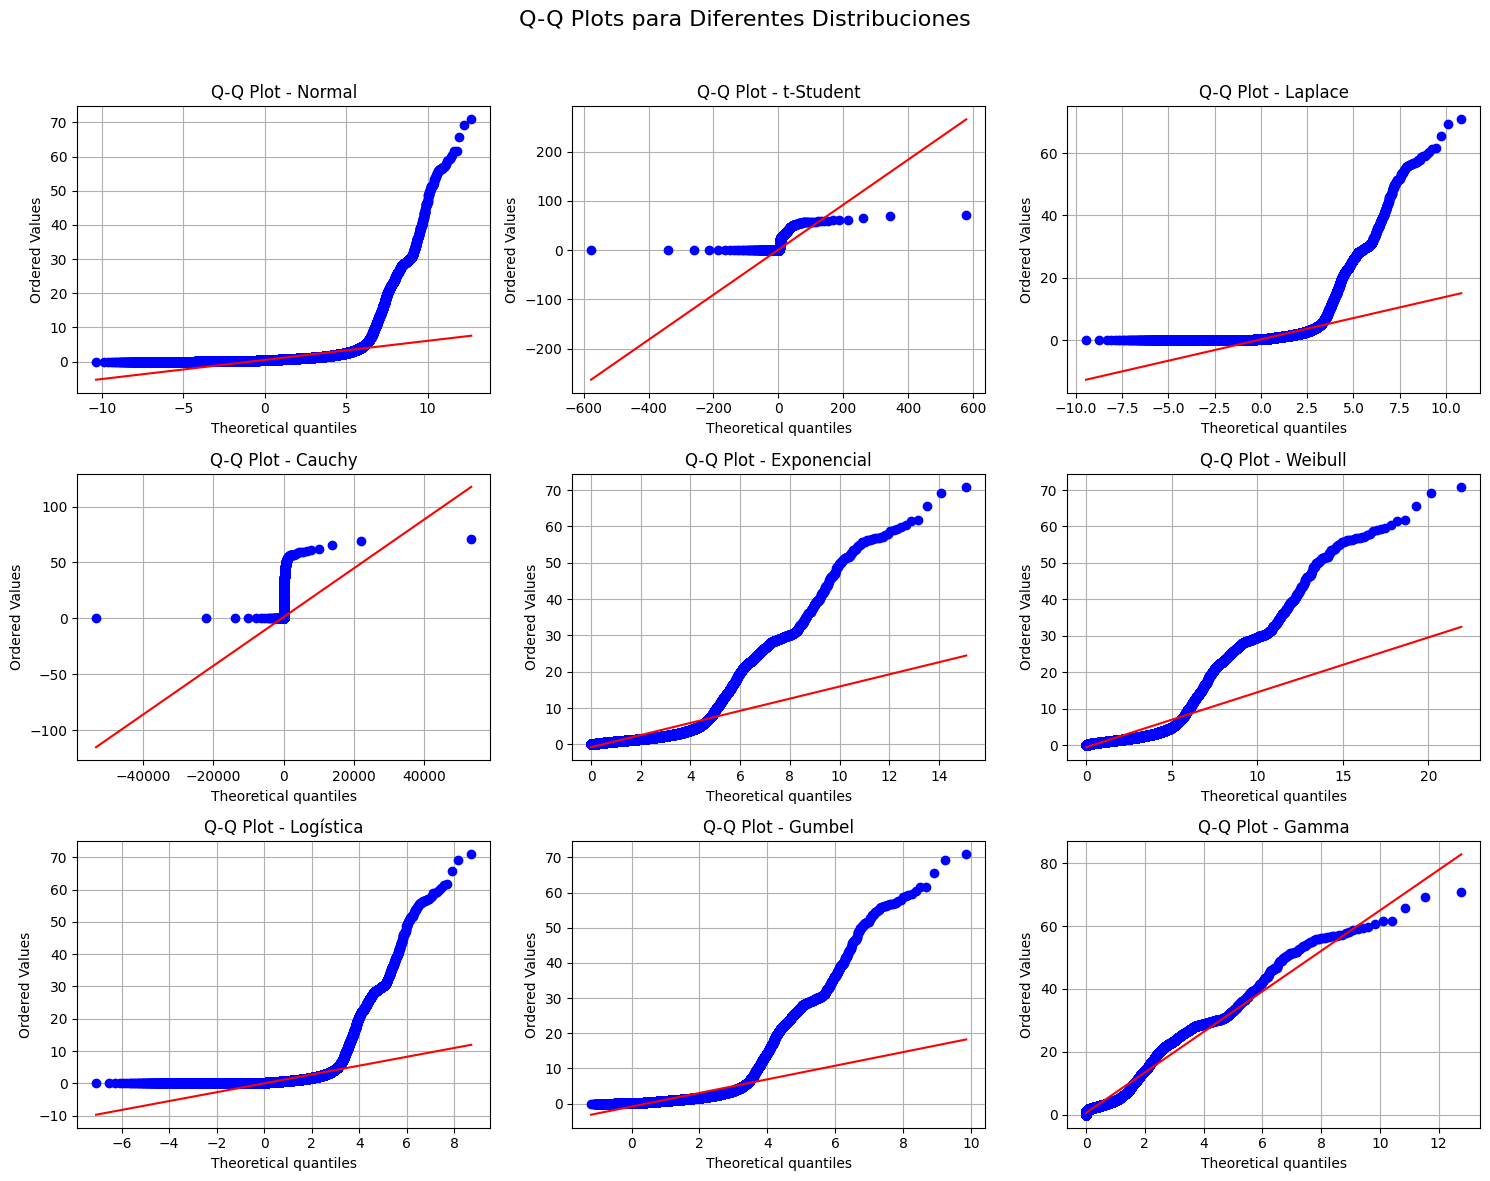

In [17]:

data = df['candle_range_percent']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


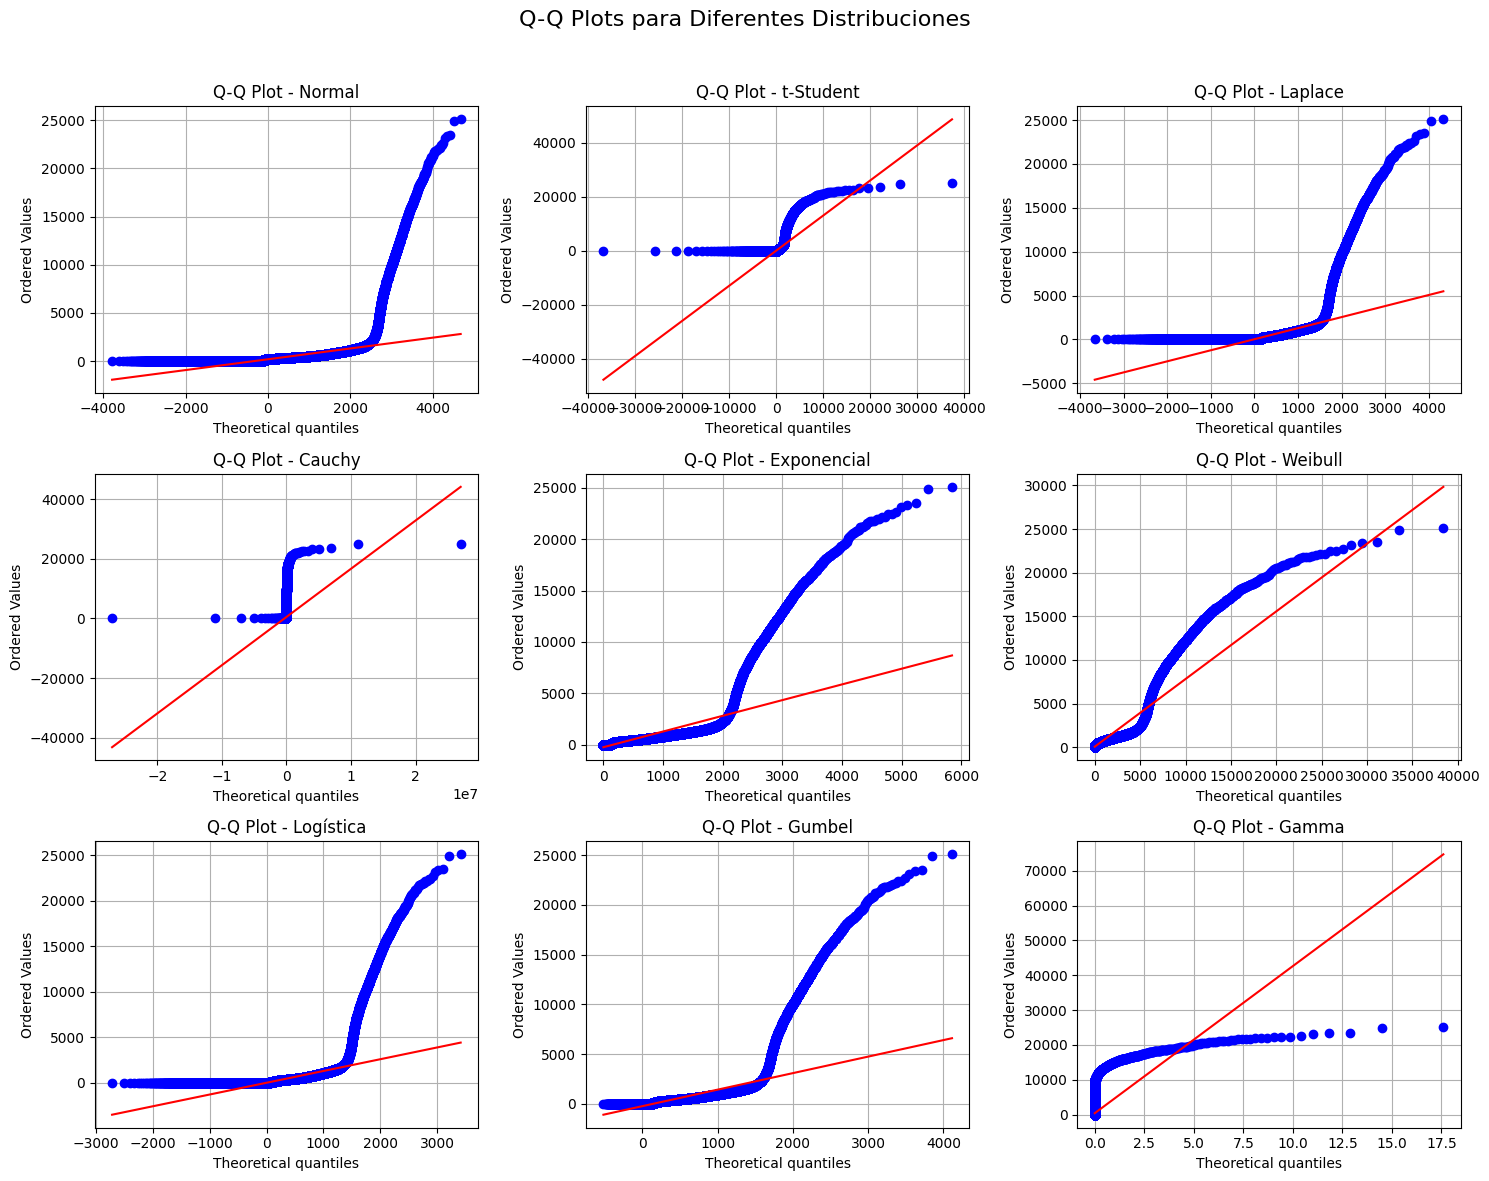

In [18]:

data = df['volume']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


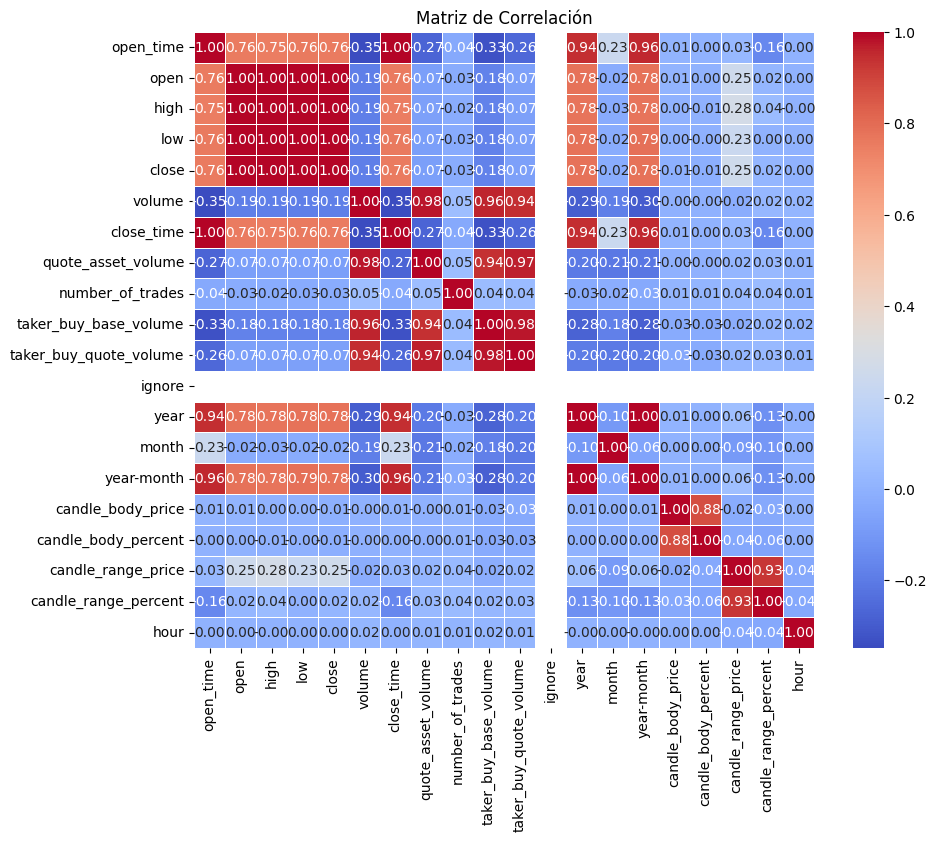

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

## Last week analisys

In [19]:
today =  pd.Timestamp.utcnow().replace(tzinfo=pytz.utc)



df_lastweek = df[df["open_time"] >= (today - pd.Timedelta(days=10))]
df_lastweek['candle_body_price'] = df_lastweek.open - df_lastweek.close
df_lastweek['candle_body_percent'] = df_lastweek.candle_body_price/df_lastweek.open *100
df_lastweek['candle_range_price'] = df_lastweek.high - df_lastweek.low
df_lastweek['candle_range_percent'] = df_lastweek.candle_range_price/df_lastweek.open *100
df_lastweek

/tmp/ipykernel_1052/946723664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastweek['candle_body_price'] = df_lastweek.open - df_lastweek.close
/tmp/ipykernel_1052/946723664.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastweek['candle_body_percent'] = df_lastweek.candle_body_price/df_lastweek.open *100
/tmp/ipykernel_1052/946723664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month,hour,candle_body_price,candle_body_percent,candle_range_price,candle_range_percent
561299,2025-02-03 05:10:00+00:00,97075.6,98999.8,97075.6,98560.9,3.940,2025-02-03 05:14:59.999,3.867814e+05,64,1.103,108596.8547,0.0,2025,2,202502,5,-1485.3,-1.530045,1924.2,1.982166
561298,2025-02-03 05:05:00+00:00,97075.5,98999.8,96921.2,97520.1,4.572,2025-02-03 05:09:59.999,4.494279e+05,156,3.063,301972.8967,0.0,2025,2,202502,5,-444.6,-0.457994,2078.6,2.141220
561297,2025-02-03 05:00:00+00:00,96500.0,97377.0,96500.0,96921.3,1.666,2025-02-03 05:04:59.999,1.614990e+05,45,1.433,138948.1036,0.0,2025,2,202502,5,-421.3,-0.436580,877.0,0.908808
561296,2025-02-03 04:55:00+00:00,98400.0,98999.8,95000.1,96500.0,13.546,2025-02-03 04:59:59.999,1.321010e+06,217,5.973,589843.3655,0.0,2025,2,202502,4,1900.0,1.930894,3999.7,4.064736
561295,2025-02-03 04:50:00+00:00,98340.0,98999.8,98000.0,98999.8,5.449,2025-02-03 04:54:59.999,5.387066e+05,53,4.411,436637.2288,0.0,2025,2,202502,4,-659.8,-0.670938,999.8,1.016677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563653,2025-01-24 06:10:00+00:00,104907.3,104989.9,103846.1,104989.9,3.892,2025-01-24 06:14:59.999,4.078398e+05,99,2.098,220261.8652,0.0,2025,1,202501,6,-82.6,-0.078736,1143.8,1.090296
563652,2025-01-24 06:05:00+00:00,103455.9,104989.9,101900.0,104907.3,4.807,2025-01-24 06:09:59.999,4.952197e+05,152,1.769,183053.9603,0.0,2025,1,202501,6,-1451.4,-1.402917,3089.9,2.986683
563651,2025-01-24 06:00:00+00:00,103100.0,103583.3,102555.8,103414.5,0.859,2025-01-24 06:04:59.999,8.848001e+04,99,0.441,45557.5018,0.0,2025,1,202501,6,-314.5,-0.305044,1027.5,0.996605
563650,2025-01-24 05:55:00+00:00,102760.0,104989.9,102555.8,102813.5,5.348,2025-01-24 05:59:59.999,5.564005e+05,320,3.161,330705.0120,0.0,2025,1,202501,5,-53.5,-0.052063,2434.1,2.368723


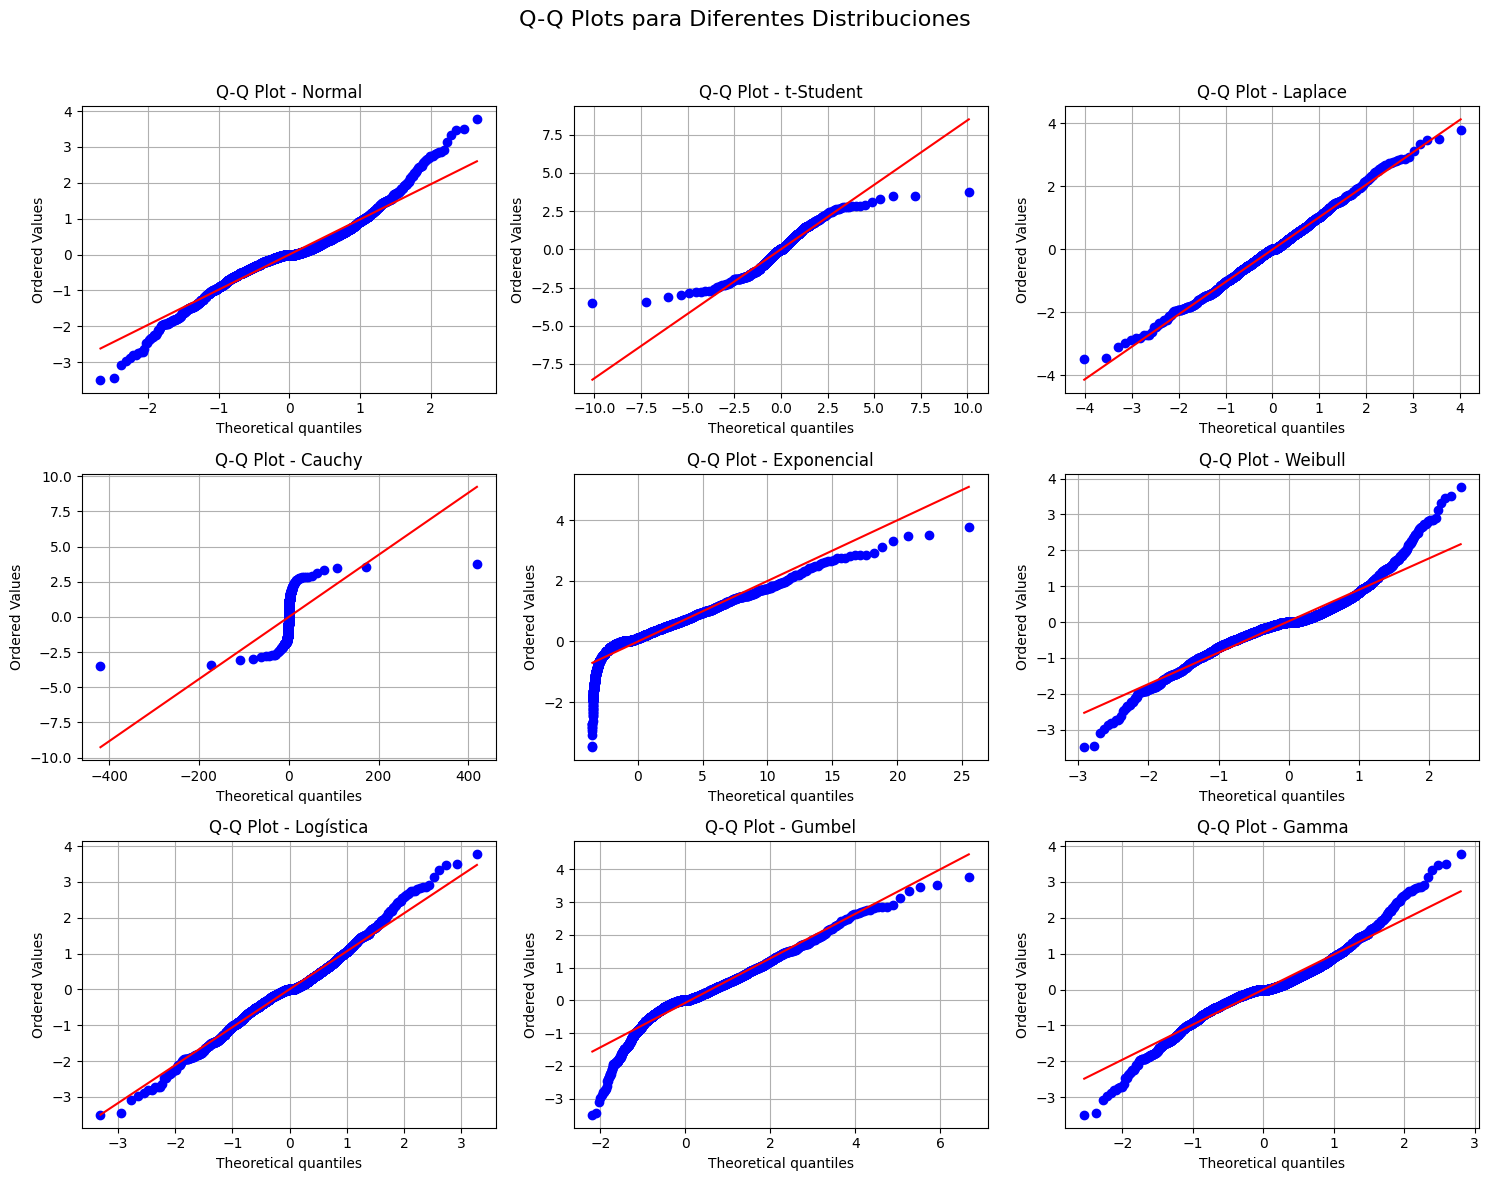

In [20]:

data = df_lastweek['candle_body_percent']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


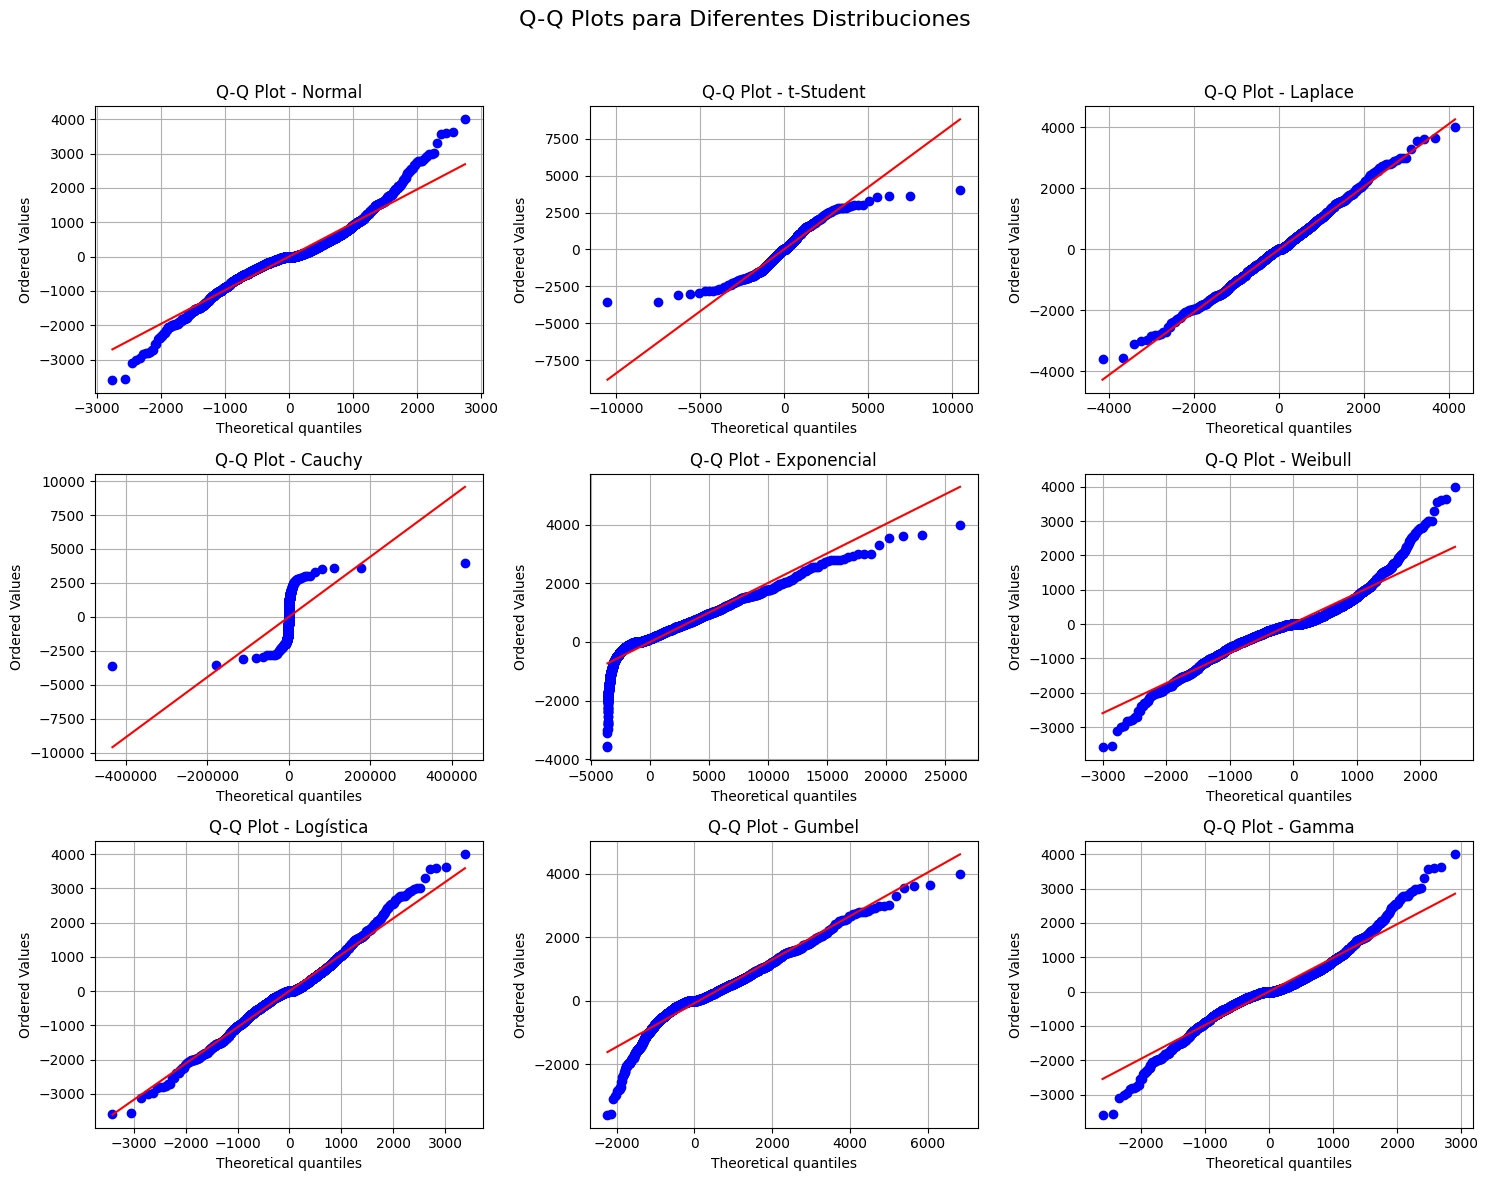

In [21]:

data = df_lastweek['candle_body_price']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()


## Bullish trend analisys

In [33]:
df_lastbull = df[(df['year-month']>=202107)&(df['year-month']<=202111)] 
df_lastbull['candle_body_price'] = df_lastbull.open - df_lastbull.close
df_lastbull['candle_body_percent'] = df_lastbull.candle_body_price/df_lastbull.open *100
df_lastbull['candle_range_price'] = df_lastbull.high - df_lastbull.low
df_lastbull['candle_range_percent'] = df_lastbull.candle_range_price/df_lastbull.open *100

df_lastbull

/tmp/ipykernel_1052/715269571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastbull['candle_body_price'] = df_lastbull.open - df_lastbull.close
/tmp/ipykernel_1052/715269571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastbull['candle_body_percent'] = df_lastbull.candle_body_price/df_lastbull.open *100
/tmp/ipykernel_1052/715269571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month,hour,candle_body_price,candle_body_percent,candle_range_price,candle_range_percent
325520,2021-11-30 23:55:00+00:00,57013.65,57017.64,56867.81,56867.81,9304.224,2021-11-30 23:59:59.999,5.302432e+08,428,3717.095,2.118568e+08,0.0,2021,11,202111,23,145.84,0.255798,149.83,0.262797
325519,2021-11-30 23:50:00+00:00,56881.16,57045.89,56809.86,57007.95,16371.259,2021-11-30 23:54:59.999,9.317214e+08,721,9177.822,5.223464e+08,0.0,2021,11,202111,23,-126.79,-0.222903,236.03,0.414953
325518,2021-11-30 23:45:00+00:00,57133.73,57145.58,56858.62,56868.89,10173.680,2021-11-30 23:49:59.999,5.799222e+08,531,3071.568,1.750496e+08,0.0,2021,11,202111,23,264.84,0.463544,286.96,0.502260
325517,2021-11-30 23:40:00+00:00,57051.87,57134.88,57051.87,57133.73,6025.792,2021-11-30 23:44:59.999,3.440574e+08,306,4150.301,2.369575e+08,0.0,2021,11,202111,23,-81.86,-0.143483,83.01,0.145499
325516,2021-11-30 23:35:00+00:00,57022.65,57104.19,57006.28,57063.45,11190.271,2021-11-30 23:39:59.999,6.384371e+08,489,6553.145,3.738597e+08,0.0,2021,11,202111,23,-40.80,-0.071551,97.91,0.171704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369168,2021-07-01 00:20:00+00:00,34687.40,34687.40,34686.01,34686.71,304.266,2021-07-01 00:24:59.999,1.055398e+07,45,151.217,5.245246e+06,0.0,2021,7,202107,0,0.69,0.001989,1.39,0.004007
369167,2021-07-01 00:15:00+00:00,34686.70,34689.47,34685.32,34686.70,297.465,2021-07-01 00:19:59.999,1.031813e+07,43,174.628,6.057357e+06,0.0,2021,7,202107,0,0.00,0.000000,4.15,0.011964
369166,2021-07-01 00:10:00+00:00,34686.71,34688.09,34686.01,34686.70,344.249,2021-07-01 00:14:59.999,1.194091e+07,49,189.582,6.576030e+06,0.0,2021,7,202107,0,0.01,0.000029,2.08,0.005997
369165,2021-07-01 00:05:00+00:00,34686.71,34688.09,34686.01,34686.71,206.574,2021-07-01 00:09:59.999,7.165367e+06,39,116.771,4.050430e+06,0.0,2021,7,202107,0,0.00,0.000000,2.08,0.005997


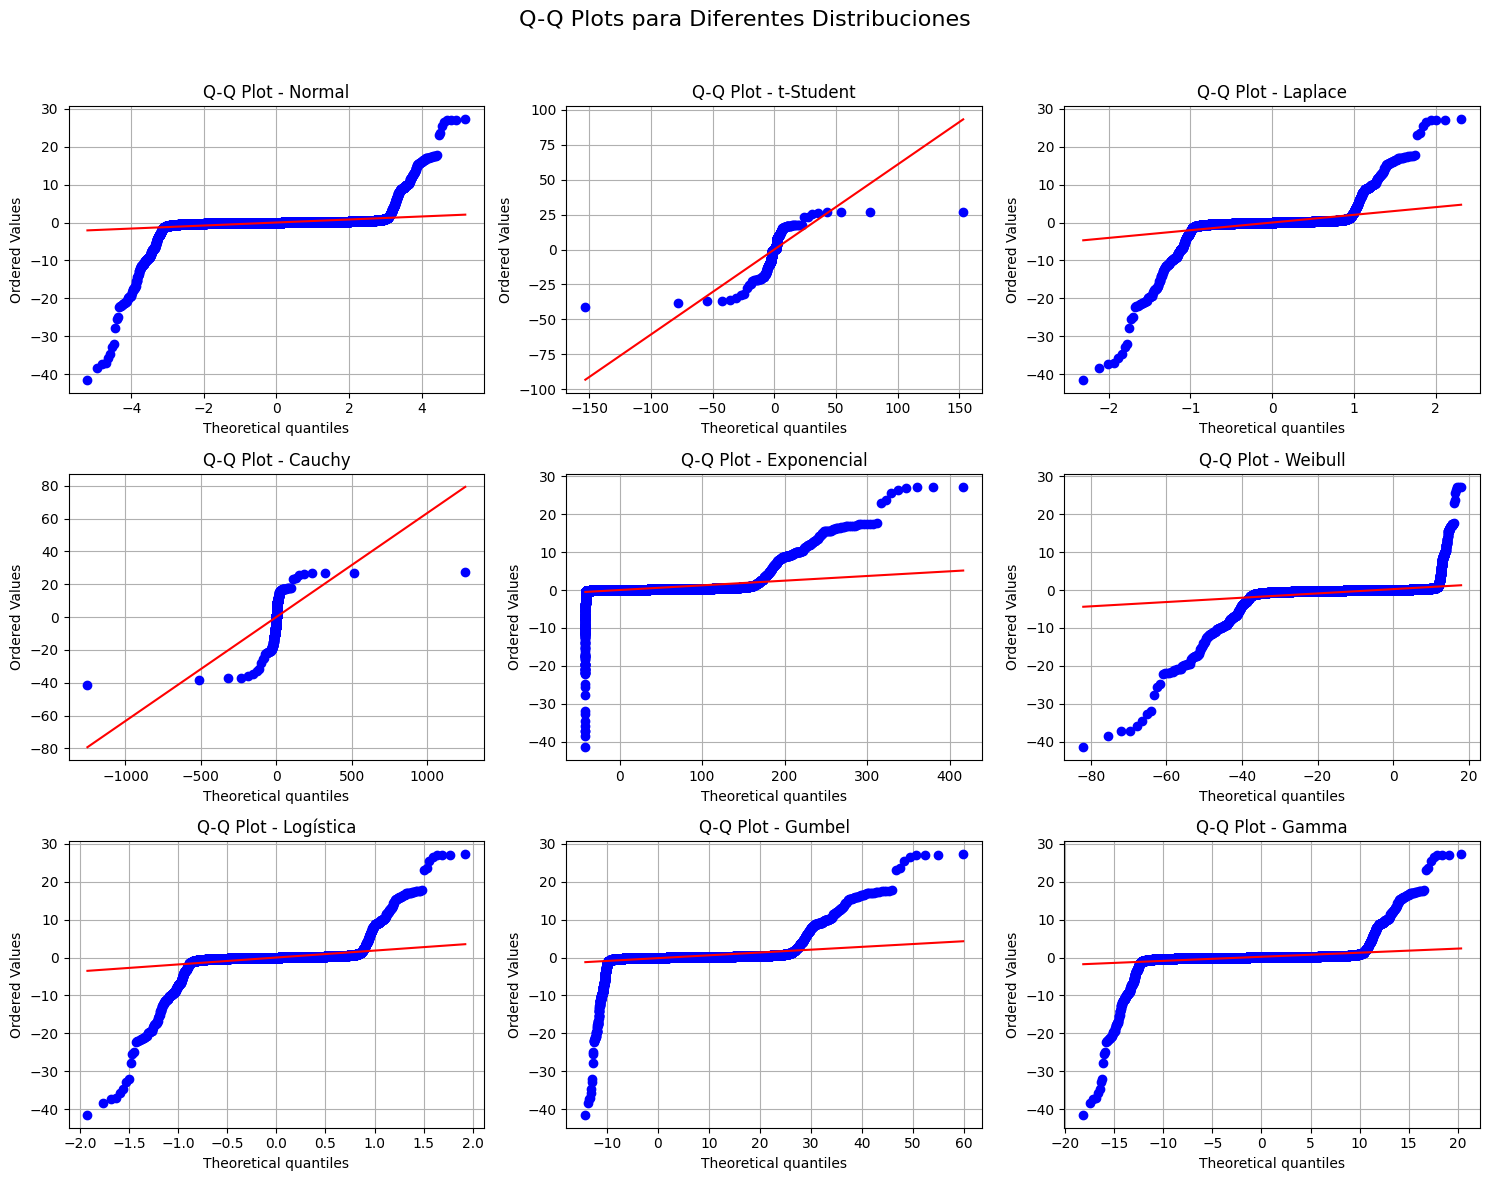

In [34]:

data = df_lastbull['candle_body_percent']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

## Bearish trend analisys

In [29]:
df_lastbear = df[(df['year-month']>=202204)&(df['year-month']<=202206)] 
df_lastbear['candle_body_price'] = df_lastbear.open - df_lastbear.close
df_lastbear['candle_body_percent'] = df_lastbear.candle_body_price/df_lastbear.open *100
df_lastbear['candle_range_price'] = df_lastbear.high - df_lastbear.low
df_lastbear['candle_range_percent'] = df_lastbear.candle_range_price/df_lastbear.open *100

df_lastbear

/tmp/ipykernel_1052/335988287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastbear['candle_body_price'] = df_lastbear.open - df_lastbear.close
/tmp/ipykernel_1052/335988287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lastbear['candle_body_percent'] = df_lastbear.candle_body_price/df_lastbear.open *100
/tmp/ipykernel_1052/335988287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore,year,month,year-month,hour,candle_body_price,candle_body_percent,candle_range_price,candle_range_percent
264375,2022-06-30 23:55:00+00:00,19161.1,19500.0,19123.4,19490.0,280.048,2022-06-30 23:59:59.999,5.406512e+06,282,161.113,3.130134e+06,0.0,2022,6,202206,23,-328.9,-1.716499,376.6,1.965440
264374,2022-06-30 23:50:00+00:00,19238.0,19238.0,19138.9,19238.0,709.911,2022-06-30 23:54:59.999,1.364019e+07,340,507.874,9.770410e+06,0.0,2022,6,202206,23,0.0,0.000000,99.1,0.515126
264373,2022-06-30 23:45:00+00:00,19065.1,19238.0,19064.2,19238.0,1265.012,2022-06-30 23:49:59.999,2.427114e+07,156,1029.226,1.975515e+07,0.0,2022,6,202206,23,-172.9,-0.906893,173.8,0.911613
264372,2022-06-30 23:40:00+00:00,19062.5,19085.2,19034.4,19067.1,761.916,2022-06-30 23:44:59.999,1.452834e+07,79,507.733,9.682927e+06,0.0,2022,6,202206,23,-4.6,-0.024131,50.8,0.266492
264371,2022-06-30 23:35:00+00:00,19116.7,19116.7,19062.5,19062.5,658.431,2022-06-30 23:39:59.999,1.256518e+07,73,248.323,4.738733e+06,0.0,2022,6,202206,23,54.2,0.283522,54.2,0.283522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290133,2022-04-01 00:20:00+00:00,45568.9,45617.3,45538.1,45598.0,447.292,2022-04-01 00:24:59.999,2.038781e+07,874,210.806,9.609005e+06,0.0,2022,4,202204,0,-29.1,-0.063859,79.2,0.173803
290132,2022-04-01 00:15:00+00:00,45626.1,45626.4,45532.6,45568.9,405.077,2022-04-01 00:19:59.999,1.846501e+07,887,269.227,1.227082e+07,0.0,2022,4,202204,0,57.2,0.125367,93.8,0.205584
290131,2022-04-01 00:10:00+00:00,45581.6,46001.0,45535.6,45626.1,796.114,2022-04-01 00:14:59.999,3.629806e+07,976,244.655,1.115638e+07,0.0,2022,4,202204,0,-44.5,-0.097627,465.4,1.021026
290130,2022-04-01 00:05:00+00:00,45537.9,45594.8,45536.6,45559.4,975.008,2022-04-01 00:09:59.999,4.442932e+07,1338,318.709,1.452164e+07,0.0,2022,4,202204,0,-21.5,-0.047213,58.2,0.127806


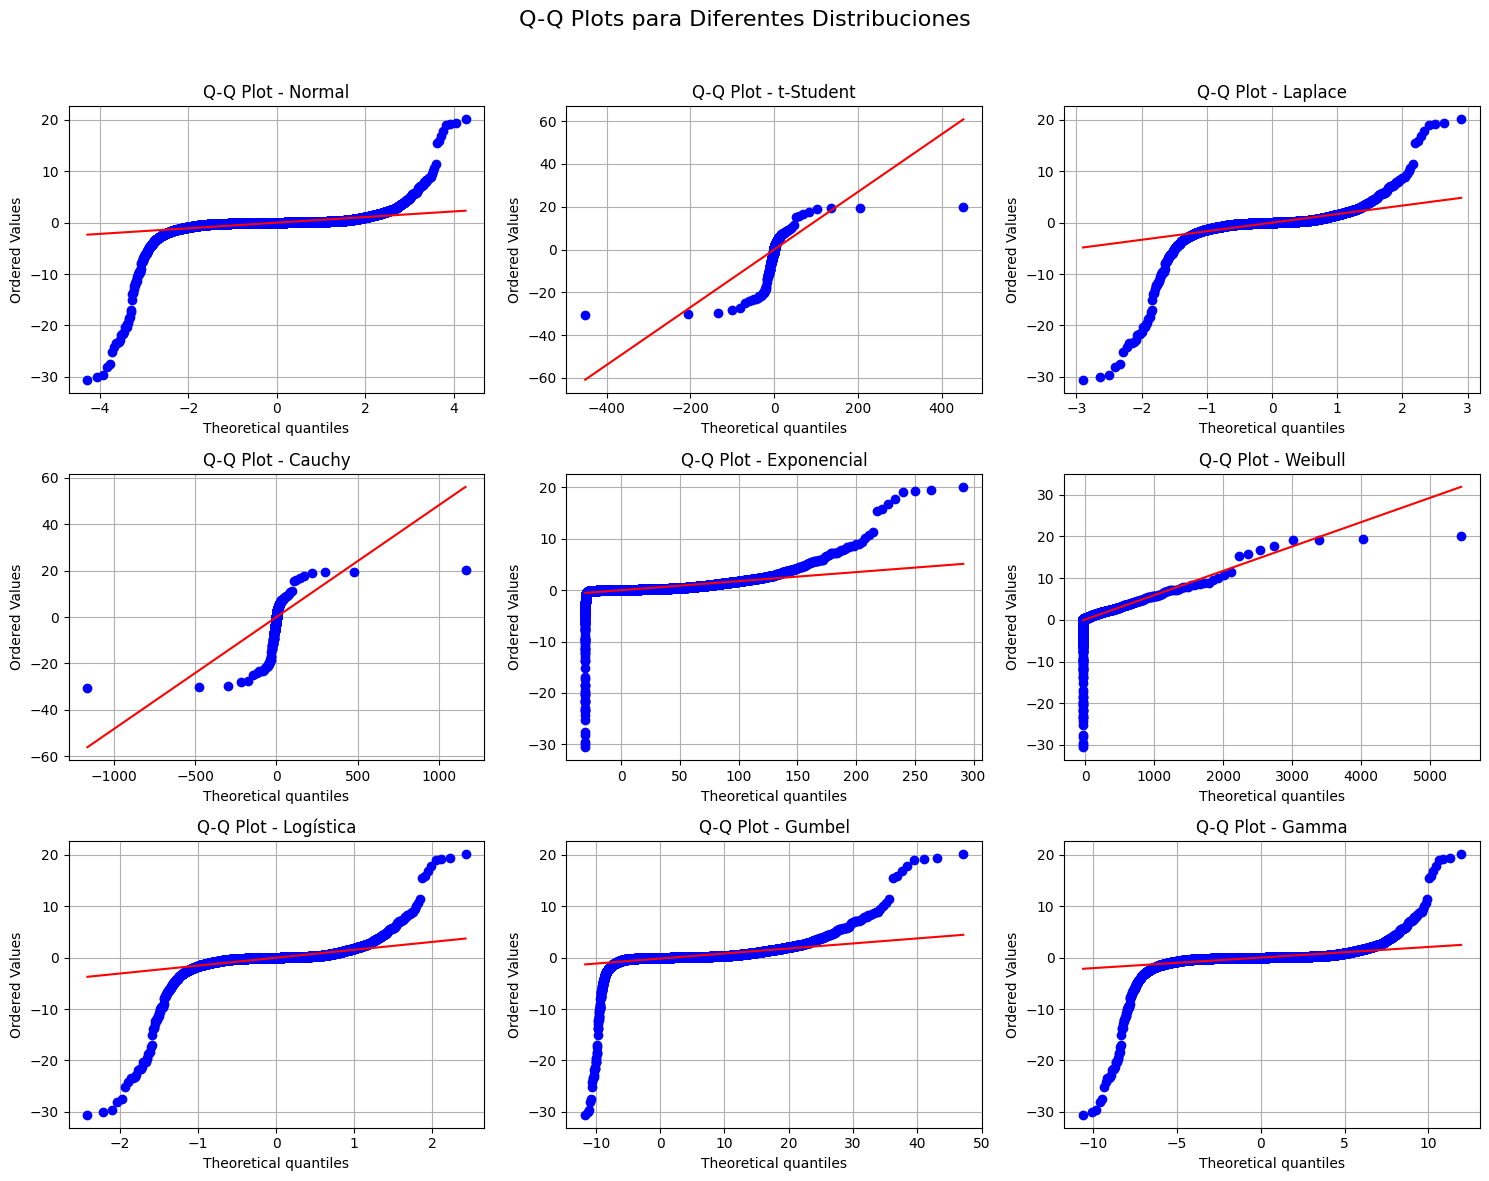

In [30]:

data = df_lastbear['candle_body_percent']

distributions = {
    "Normal": stats.norm,
    "t-Student": stats.t,
    "Laplace": stats.laplace,
    "Cauchy": stats.cauchy,
    "Exponencial": stats.expon,
    "Weibull": stats.weibull_min,
    "Logística": stats.logistic,
    "Gumbel": stats.gumbel_r,
    "Gamma": stats.gamma,
}

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Q-Q Plots para Diferentes Distribuciones", fontsize=16)


for ax, (name, dist) in zip(axes.flatten(), distributions.items()):
    params = dist.fit(data)  
    stats.probplot(data, dist=dist, sparams=params, plot=ax)
    ax.set_title(f"Q-Q Plot - {name}")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()